In [ ]:
!wget https://lodmedia.hb.bizmrg.com/case_files/1112984/train_dataset_train_data_Minprirodi.zip

--2024-07-05 14:39:22--  https://lodmedia.hb.bizmrg.com/case_files/1112984/train_dataset_train_data_Minprirodi.zip
Resolving lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)... 95.163.53.117
Connecting to lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)|95.163.53.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16880032097 (16G) [application/zip]
Saving to: ‘train_dataset_train_data_Minprirodi.zip’

train_dataset_train 100%[===================>]  15.72G  20.0MB/s    in 13m 21s 

2024-07-05 14:52:45 (20.1 MB/s) - ‘train_dataset_train_data_Minprirodi.zip’ saved [16880032097/16880032097]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp ./drive/MyDrive/train_dataset_train_data_Minprirodi.zip ./

In [ ]:
!rm -r train_data_Minprirodi

In [ ]:
!unzip -P y6rX2qHwhMmvakeP5YJELd -qq train_dataset_train_data_Minprirodi.zip

In [ ]:
import pandas as pd
import cv2
import glob

In [ ]:
reg = pd.read_csv("train_data_Minprirodi/registration.csv")

In [ ]:
reg.link.duplicated().sum()

0

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
frame = cv2.imread("train_data_Minprirodi/traps/1/IMG_0013.JPG")

In [ ]:
x1, y1, x2, y2 = (560, 338, 1496, 1428)

In [ ]:
reg

,name_folder,name,class_predict,date_registration,bbox,registrations_id,registration_class,count,max_count,flag,link
0,1,Im_0011814.jpg,Bear,2020-07-22 07:02:52,1336 365 2048 1186,registration 000001 2.0,Bear,1.0,2.0,0 days 00:27:35,1/IMG_0004.JPG
1,1,Im_0011850.jpg,Bear,2020-07-22 07:02:55,717 322 1949 1293,registration 000001 2.0,Bear,1.0,2.0,0 days 00:27:35,1/IMG_0005.JPG
2,1,Im_0011785.jpg,Bear,2020-07-22 07:02:58,724 264 1950 1293,registration 000001 2.0,Bear,1.0,2.0,0 days 00:27:35,1/IMG_0006.JPG
3,1,Im_0011864.jpg,Bear,2020-07-22 07:29:05,560 338 1496 1428,registration 000001 2.0,Bear,2.0,2.0,0 days 00:27:35,1/IMG_0013.JPG
4,1,Im_0011870.jpg,Bear,2020-07-22 07:29:08,598 400 1504 1426,registration 000001 2.0,Bear,1.0,2.0,0 days 00:27:35,1/IMG_0014.JPG
...,...,...,...,...,...,...,...,...,...,...,...
21008,9,Im_0010864.jpg,Musk_Deer,2020-05-17 20:03:33,1569 1016 2173 1871,registration 002172 1.0,Roe_Deer,NaN,1.0,0 days 00:28:21,9/IMAG0706.JPG
21009,9,Im_0010782.jpg,Musk_Deer,2020-05-17 20:08:26,1605 1083 2318 1857,registration 002172 1.0,Roe_Deer,NaN,1.0,0 days 00:28:21,9/IMAG0707.JPG
21010,9,Im_0010913.jpg,Musk_Deer,2020-05-17 20:08:31,1610 1068 2327 1862,registration 002172 1.0,Roe_Deer,NaN,1.0,0 days 00:28:21,9/IMAG0708.JPG
21011,9,Im_0010867.jpg,Roe_Deer,2020-05-17 20:26:32,1914 1213 2206 1821,registration 002172 1.0,Roe_Deer,1.0,1.0,0 days 00:28:21,9/IMAG0709.JPG


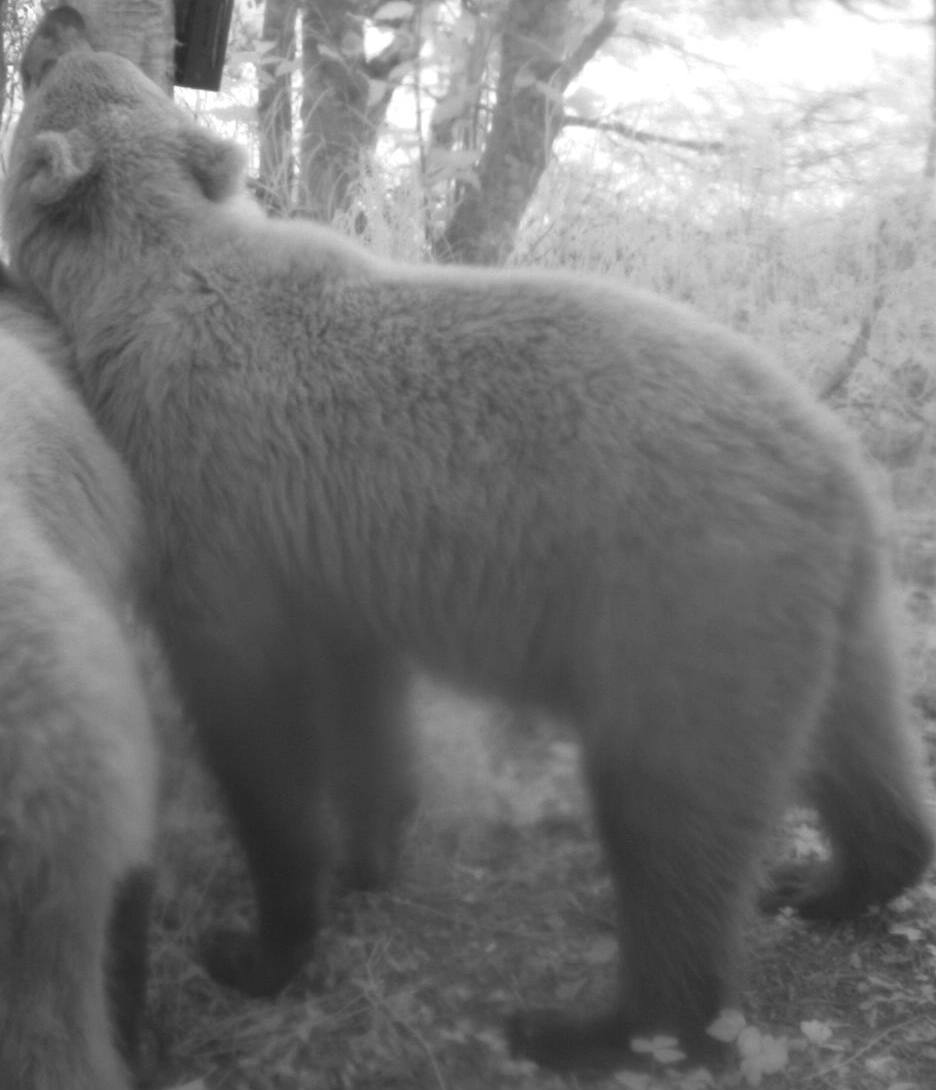

In [ ]:
cv2_imshow(frame[y1:y2, x1:x2])

In [ ]:
import os
os.mkdir("./dataset")
os.mkdir("./dataset/images/")

In [ ]:
import random, string

def generate_random_filename(extension='', length=30):

    # Создаем строку из случайных символов
    random_filename = ''.join(random.choices(string.ascii_letters + string.digits, k=length))

    # Добавляем расширение файла, если оно указано
    if extension:
        if not extension.startswith('.'):
            extension = '.' + extension
        random_filename += extension

    return random_filename

In [ ]:
from tqdm.auto import tqdm

In [ ]:
dataset = pd.DataFrame(columns=["name", "obj"])

In [ ]:
for i in tqdm(reg.iterrows(), total=reg.shape[0]):
    frame = cv2.imread("./train_data_Minprirodi/traps/" + i[1].link)
    x1, y1, x2, y2 = map(int, i[1].bbox.split())
    try:
        frame = frame[y1:y2, x1:x2]
        filename = generate_random_filename(".jpg")

        cv2.imwrite("./dataset/images/" + filename, frame)
        new_raw = pd.DataFrame({"name": [filename], "obj": [i[1].registration_class]})
        dataset = pd.concat([dataset, new_raw], ignore_index=True)
    except Exception as ex:
        print(ex)

  0%|          | 0/21013 [00:00<?, ?it/s]

In [ ]:
dataset.to_csv("dataset/data.csv", index=False)

In [ ]:
!zip -r drive/MyDrive/data.zip dataset/

In [ ]:
len(files)

1504

In [ ]:
import shutil

In [ ]:
for i in tqdm(files[1:]):
    filename = i.split("/")[-1]
    label_name = filename.split(".")[0] + ".txt"
    try:
        shutil.move("./yolo_dataset/images/train/" + filename, "./yolo_dataset/images/val/" + filename)
        shutil.move("./yolo_dataset/labels/train/" + label_name, "./yolo_dataset/labels/val/" + label_name)
    except FileNotFoundError:
        pass
    # break

  0%|          | 0/1503 [00:00<?, ?it/s]